### Overview
In this project, we will build a classification model to predict whether an individual is likely to have heart disease or not. The dataset provided includes various health and demographic factors such as age, blood pressure, cholesterol levels, and lifestyle habits (e.g., smoking and alcohol consumption). The goal is to train a model to identify which individuals have heart disease based on these features.

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import warnings

warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
df = pd.read_csv("C:/Users/ROHITH/Downloads/Data_file - data_file.csv")
df.head()


,date,country,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease
0,03-05-2021,Indonesia,0,1,18393,0,110,80,1,2,1,168,Architect,0,62.0,0
1,05-08-2021,Malaysia,1,1,20228,0,140,90,3,1,1,156,Accountant,0,85.0,1
2,13-11-2022,Indonesia,2,0,18857,0,130,70,3,1,1,165,Chef,0,64.0,1
3,31-10-2018,Singapore,3,1,17623,0,150,100,1,2,1,169,Lawyer,0,82.0,1
4,25-09-2020,Singapore,4,0,17474,0,100,60,1,1,1,156,Architect,0,56.0,0


In [3]:
df.describe()

,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,smoke,weight,disease
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,0.803729,19468.865814,0.053771,128.817286,96.630414,1.366871,1.349571,1.226457,164.359229,0.088129,74.205690,0.499700
std,28851.302323,0.397179,2467.251667,0.225568,154.011419,188.472530,0.680250,0.476838,0.572270,8.210126,0.283484,14.395757,0.500003
min,0.000000,0.000000,10798.000000,0.000000,-150.000000,-70.000000,1.000000,1.000000,1.000000,55.000000,0.000000,10.000000,0.000000
25%,25006.750000,1.000000,17664.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,159.000000,0.000000,65.000000,0.000000
50%,50001.500000,1.000000,19703.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,165.000000,0.000000,72.000000,0.000000
75%,74889.250000,1.000000,21327.000000,0.000000,140.000000,90.000000,2.000000,2.000000,1.000000,170.000000,0.000000,82.000000,1.000000
max,99999.000000,1.000000,23713.000000,1.000000,16020.000000,11000.000000,3.000000,2.000000,3.000000,250.000000,1.000000,200.000000,1.000000


In [4]:
# Drop any unnecessary columns (for example, 'id', 'date')
df.drop(['id', 'date'], axis=1, inplace=True)

In [5]:
# Checking for null values
df.isnull().sum()

country        0
active         0
age            0
alco           0
ap_hi          0
ap_lo          0
cholesterol    0
gender         0
gluc           0
height         0
occupation     0
smoke          0
weight         0
disease        0
dtype: int64

In [6]:
# Convert categorical variables to numerical ones
label_encoder = LabelEncoder()
df['country'] = label_encoder.fit_transform(df['country'])
df['occupation'] = label_encoder.fit_transform(df['occupation'])

In [7]:
# Define features (X) and target variable (y)
X = df.drop('disease', axis=1)
y = df['disease']

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Normalize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

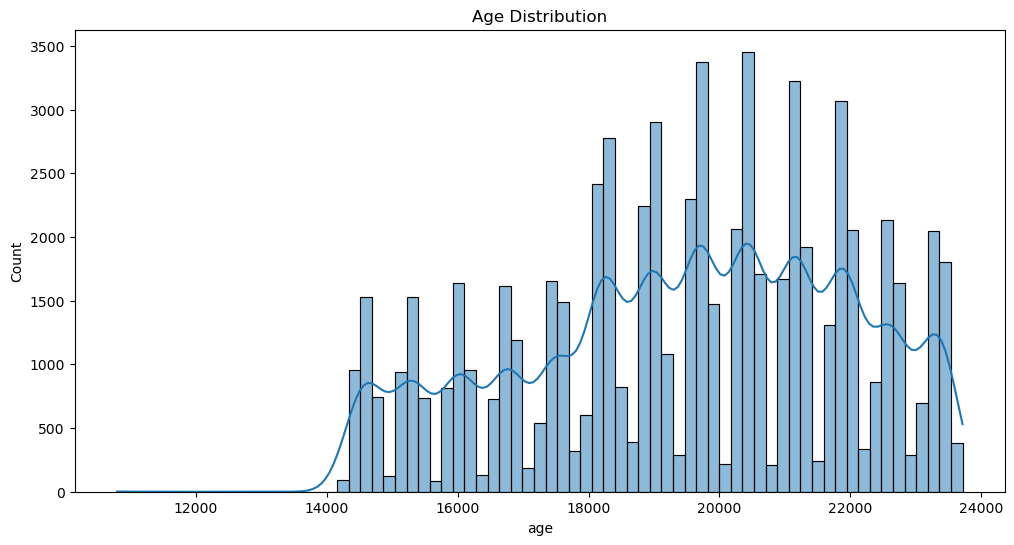

In [10]:
# Visualize the distribution of key features
plt.figure(figsize=(12,6))
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

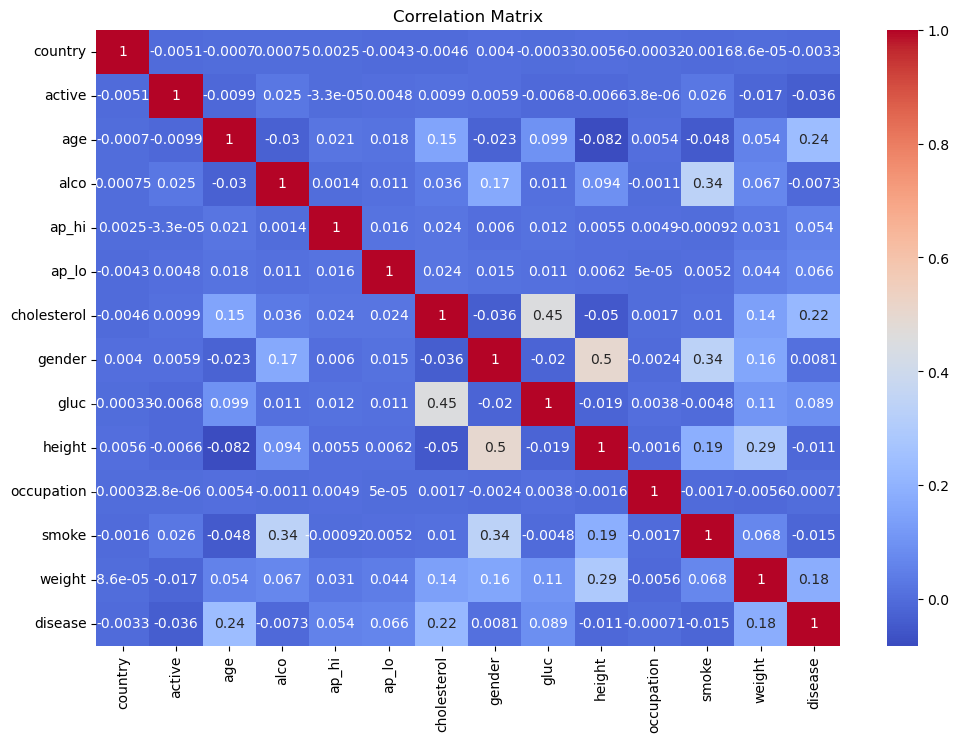

In [11]:
# Correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [12]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [13]:
# Predict on the test set
y_pred_log = log_reg.predict(X_test)

In [14]:
# Accuracy score for Logistic Regression
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {accuracy_log * 100:.2f}%")

Logistic Regression Accuracy: 72.31%


In [15]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [16]:
# Predict on the test set
y_pred_tree = tree.predict(X_test)

In [17]:
# Accuracy score for Decision Tree
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy: {accuracy_tree * 100:.2f}%")

Decision Tree Accuracy: 62.73%


In [22]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [23]:
# Predict on the test set
y_pred_svm = svm.predict(X_test)

# Accuracy score for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")


SVM Accuracy: 72.88%


In [27]:
# Defining a custom function to call for the evaluation

def evaluate_model(y_test, y_pred, model_name):
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.show()

    # Classification Report
    print(f"{model_name} - Classification Report:")
    print(classification_report(y_test, y_pred))

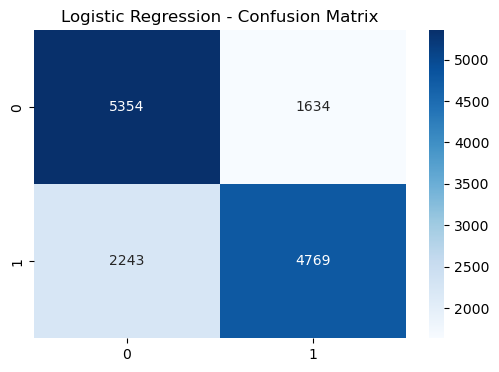

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.77      0.73      6988
           1       0.74      0.68      0.71      7012

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000



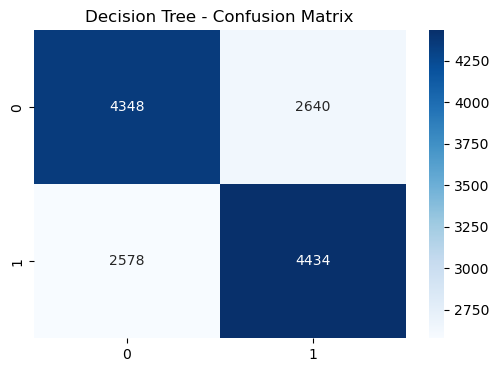

Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.62      0.62      6988
           1       0.63      0.63      0.63      7012

    accuracy                           0.63     14000
   macro avg       0.63      0.63      0.63     14000
weighted avg       0.63      0.63      0.63     14000



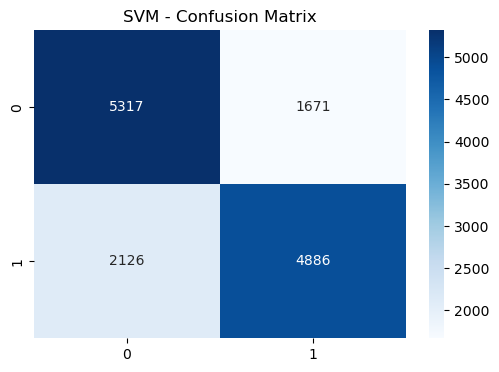

SVM - Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.76      0.74      6988
           1       0.75      0.70      0.72      7012

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



In [28]:
# Evaluate each model

evaluate_model(y_test, y_pred_log, "Logistic Regression")
evaluate_model(y_test, y_pred_tree, "Decision Tree")
evaluate_model(y_test, y_pred_svm, "SVM")

In [29]:
param_grid_log = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'saga']}
grid_log_reg = GridSearchCV(LogisticRegression(random_state=42), param_grid_log, cv=5, scoring='accuracy')
grid_log_reg.fit(X_train, y_train)

print(f"Best Logistic Regression Parameters: {grid_log_reg.best_params_}")
print(f"Best Logistic Regression Accuracy: {grid_log_reg.best_score_ * 100:.2f}%")

Best Logistic Regression Parameters: {'C': 10, 'solver': 'liblinear'}
Best Logistic Regression Accuracy: 71.90%
